

---


#**Employee Data**


###Exploring Factors Influencing Gender Distribution, Job Satisfaction, and Performance Metrics

---





###The dataset contains employee records with the following columns:

**ID_Num:** A unique identifier for each employee.

**First Name:** The first name of the employee.

**Last Name:**The last name of the employee.

**Gender:**The gender of the employee (Male/Female).

**Start Date:** The date when the employee started working.

**Years:** The number of years the employee has worked.

**Department:** The department in which the employee works.

**Country:**The country where the employee is located.

**Center:** The work center location.

**Monthly Salary:** The employee's monthly salary.

**Annual Salary:** The employee's annual salary.

**Job Rate:** A rating of the employee's job performance

**Sick Leaves:** The number of sick leaves taken by the employee.

**Unpaid Leaves:**  represents the number of days an employee has taken off work without pay.

**Overtime Hours:** The number of overtime hours worked by the employee.



---



In [78]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_excel('/content/Employees.xlsx')

In [80]:
df.head()

,ID_Num,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,6.0,Quality Control,Egypt,West,1560,18720,3.0,1.0,NaN,183.0
1,2,Omar,Hishan,Male,2020-05-21,4.0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0.0,5.0,198.0
2,3,Ailya,Sharaf,Female,2017-09-28,6.0,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0.0,3.0,192.0
3,4,Lwiy,Qbany,Male,2018-08-14,6.0,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0.0,NaN,7.0
4,5,Ahmad,Bikri,Male,2020-03-11,4.0,Manufacturing,Egypt,Main,970,11640,5.0,0.0,5.0,121.0


In [81]:
df.columns

Index(['ID_Num', 'First Name', 'Last Name', 'Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Num          691 non-null    int64         
 1   First Name      691 non-null    object        
 2   Last Name       691 non-null    object        
 3   Gender          691 non-null    object        
 4   Start Date      688 non-null    datetime64[ns]
 5   Years           684 non-null    float64       
 6   Department      691 non-null    object        
 7   Country         691 non-null    object        
 8   Center          691 non-null    object        
 9   Monthly Salary  691 non-null    int64         
 10  Annual Salary   691 non-null    int64         
 11  Job Rate        690 non-null    float64       
 12  Sick Leaves     679 non-null    float64       
 13  Unpaid Leaves   446 non-null    float64       
 14  Overtime Hours  689 non-null    float64       
dtypes: dat

In [83]:
df.describe()

,ID_Num,Start Date,Years,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
count,691.000000,688,684.000000,691.000000,691.000000,690.000000,679.000000,446.000000,689.000000
mean,346.000000,2019-01-25 08:47:26.511628032,5.450292,2070.319826,24843.837916,3.584058,1.612666,1.080717,13.702467
min,1.000000,2016-01-08 00:00:00,3.000000,703.000000,8436.000000,1.000000,0.000000,0.000000,0.000000
25%,173.500000,2018-04-06 12:00:00,4.000000,1439.000000,17268.000000,3.000000,0.000000,0.000000,3.000000
50%,346.000000,2019-04-03 00:00:00,5.000000,2080.000000,24960.000000,3.000000,0.000000,0.000000,7.000000
75%,518.500000,2019-12-19 00:00:00,6.000000,2687.000000,32244.000000,5.000000,3.000000,2.000000,10.000000
max,691.000000,2020-12-29 00:00:00,124.000000,3450.000000,41400.000000,5.000000,6.000000,6.000000,198.000000
std,199.618803,NaN,6.555463,763.500668,9162.008016,1.350496,2.201880,1.871786,25.692049


In [84]:
# Unknown Values in Data
df.isin(['Unknown']).sum()


,0
ID_Num,0
First Name,0
Last Name,0
Gender,5
Start Date,0
Years,0
Department,0
Country,0
Center,0
Monthly Salary,0


In [85]:
# Replace 'Unknown' with NaN in "Gender" coloumn
df.replace('Unknown', np.nan, inplace=True)
df['Gender'] = df['Gender'].replace('Unknown', np.nan)


# Unknown Values in Data
df.isin(['Unknown']).sum()



,0
ID_Num,0
First Name,0
Last Name,0
Gender,0
Start Date,0
Years,0
Department,0
Country,0
Center,0
Monthly Salary,0


In [86]:
df.isnull().sum()

,0
ID_Num,0
First Name,0
Last Name,0
Gender,5
Start Date,3
Years,7
Department,0
Country,0
Center,0
Monthly Salary,0


In [87]:
# Drop rows with NaN values in the specified columns
df_cleaned = df.dropna(subset=['Gender', 'Start Date', 'Years', 'Job Rate', 'Sick Leaves', 'Overtime Hours'])

# Drop the "Unpaid Leaves" column because it has too many NaN values
df_cleaned = df_cleaned.drop('Unpaid Leaves', axis=1)

# Check for any remaining missing values in the cleaned DataFrame
df_cleaned.isnull().sum()

,0
ID_Num,0
First Name,0
Last Name,0
Gender,0
Start Date,0
Years,0
Department,0
Country,0
Center,0
Monthly Salary,0


In [88]:
#Display Cleaned data
df_cleaned.head()

,ID_Num,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,6.0,Quality Control,Egypt,West,1560,18720,3.0,1.0,183.0
1,2,Omar,Hishan,Male,2020-05-21,4.0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0.0,198.0
2,3,Ailya,Sharaf,Female,2017-09-28,6.0,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0.0,192.0
3,4,Lwiy,Qbany,Male,2018-08-14,6.0,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0.0,7.0
4,5,Ahmad,Bikri,Male,2020-03-11,4.0,Manufacturing,Egypt,Main,970,11640,5.0,0.0,121.0


In [89]:
df_cleaned.dtypes

,0
ID_Num,int64
First Name,object
Last Name,object
Gender,object
Start Date,datetime64[ns]
Years,float64
Department,object
Country,object
Center,object
Monthly Salary,int64


In [90]:
# Convert data type

df_cleaned['First Name'] = df_cleaned['First Name'].astype('category')
df_cleaned['Last Name'] = df_cleaned['Last Name'].astype('category')
df_cleaned['Gender'] = df_cleaned['Gender'].astype('category')
df_cleaned['Department'] = df_cleaned['Department'].astype('category')
df_cleaned['Country'] = df_cleaned['Country'].astype('category')
df_cleaned['Center'] = df_cleaned['Center'].astype('category')

df_cleaned['Years'] = df_cleaned['Years'].astype('int64')



In [91]:
df_cleaned.dtypes

,0
ID_Num,int64
First Name,category
Last Name,category
Gender,category
Start Date,datetime64[ns]
Years,int64
Department,category
Country,category
Center,category
Monthly Salary,int64


In [92]:
df_cleaned.shape

(666, 14)

In [93]:
# Check if 'Annual Salary' is equal to 'Monthly Salary' multiplied by 12
df_cleaned['SalaryCheck'] = np.where(df_cleaned['Annual Salary'] == df_cleaned['Monthly Salary'] * 12, True, False)

# Display the result
df_cleaned['SalaryCheck'].value_counts()


,count
SalaryCheck,
True,666


In [94]:
# Drop the "Monthly Salary" and "SalaryCheck" column
df_cleaned = df_cleaned.drop('Monthly Salary', axis=1)
df_cleaned = df_cleaned.drop('SalaryCheck', axis=1)

df_cleaned.dtypes

,0
ID_Num,int64
First Name,category
Last Name,category
Gender,category
Start Date,datetime64[ns]
Years,int64
Department,category
Country,category
Center,category
Annual Salary,int64


In [95]:
df_cleaned['Start Date'] = pd.to_datetime(df_cleaned['Start Date']).dt.strftime('%d-%m-%Y')

In [96]:
from google.colab import files

# Save the cleaned DataFrame to an Excel file named 'New Employees.xlsx'
df_cleaned.to_excel('New Employees.xlsx', index=False)

# Trigger download of the 'New Employees.xlsx' file to the local machine
files.download('New Employees.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

___

In [97]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for column in ['First Name', 'Last Name', 'Gender', 'Department', 'Country', 'Center']:
  df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])


In [98]:
df_cleaned.dtypes

,0
ID_Num,int64
First Name,int64
Last Name,int64
Gender,int64
Start Date,object
Years,int64
Department,int64
Country,int64
Center,int64
Annual Salary,int64


In [99]:
# Convert 'Start Date' column to datetime format
df_cleaned['Start Date'] = pd.to_datetime(df_cleaned['Start Date'], errors='coerce')

# Check for any NaT (Not a Time) values that couldn't be converted and handle them if needed
df_cleaned = df_cleaned.dropna(subset=['Start Date'])

# Convert 'Start Date' to a numeric feature: number of days since the start date
df_cleaned['Start Date Numeric'] = (pd.to_datetime('today') - df_cleaned['Start Date']).dt.days

df_cleaned = df_cleaned.drop('Start Date', axis=1)


<ipython-input-99-a56b32bfc0ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Start Date Numeric'] = (pd.to_datetime('today') - df_cleaned['Start Date']).dt.days


In [100]:
df_cleaned.head()

,ID_Num,First Name,Last Name,Gender,Years,Department,Country,Center,Annual Salary,Job Rate,Sick Leaves,Overtime Hours,Start Date Numeric
0,1,117,344,1,6,15,0,4,18720,3.0,1.0,183.0,2342
4,5,24,239,1,4,9,0,1,11640,5.0,0.0,121.0,1398
5,6,196,557,1,8,12,2,2,27984,3.0,3.0,8.0,3134
6,7,139,83,0,4,18,4,1,23508,3.0,6.0,116.0,1488
7,8,196,31,1,6,0,0,1,40728,5.0,0.0,7.0,2161



---
#Model Comparison for Classification


In [101]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

X = df_cleaned[['ID_Num','First Name','Last Name','Start Date Numeric' ,'Years','Department','Country','Center','Annual Salary','Job Rate','Sick Leaves','Overtime Hours',]]

# Define the target variable
y = df_cleaned['Gender']


In [102]:

# List of classifiers to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=32),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'MLP Classifier': MLPClassifier(random_state=42, max_iter=500)
}

# Initialize variables to store the best model's details
best_model_name = None
best_accuracy = 0
best_mse = None


In [103]:
# Iterate through models and evaluate them
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred) * 100

    # Display the results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Mean Squared Error: {mse:.2f}%\n")

    # Update the best model if current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_mse = mse


Model: Logistic Regression
Accuracy: 81.00%
Mean Squared Error: 19.00%

Model: Support Vector Classifier
Accuracy: 91.50%
Mean Squared Error: 8.50%

Model: K-Nearest Neighbors
Accuracy: 95.00%
Mean Squared Error: 5.00%

Model: Decision Tree
Accuracy: 79.50%
Mean Squared Error: 20.50%

Model: Random Forest
Accuracy: 88.50%
Mean Squared Error: 11.50%

Model: Gradient Boosting
Accuracy: 88.50%
Mean Squared Error: 11.50%

Model: XGBoost
Accuracy: 90.00%
Mean Squared Error: 10.00%

Model: Naive Bayes
Accuracy: 84.50%
Mean Squared Error: 15.50%

Model: Linear Discriminant Analysis
Accuracy: 80.00%
Mean Squared Error: 20.00%

Model: MLP Classifier
Accuracy: 94.50%
Mean Squared Error: 5.50%



In [104]:
# Print the best model's details
print(f"The best model is {best_model_name} with an accuracy of {best_accuracy:.2f}% and an MSE of {best_mse:.2f}%")

The best model is K-Nearest Neighbors with an accuracy of 95.00% and an MSE of 5.00%




---


# K-Nearest Neighbors Model





In [105]:
# Initialize the model
model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors can be adjusted based on your needs

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred) * 100

# Print the results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Mean Squared Error: {mse:.2f}%")


Accuracy: 95.00%
Mean Squared Error: 5.00%




---


#**Some Visualizations**

##Plot showing gender distribution across various departments.


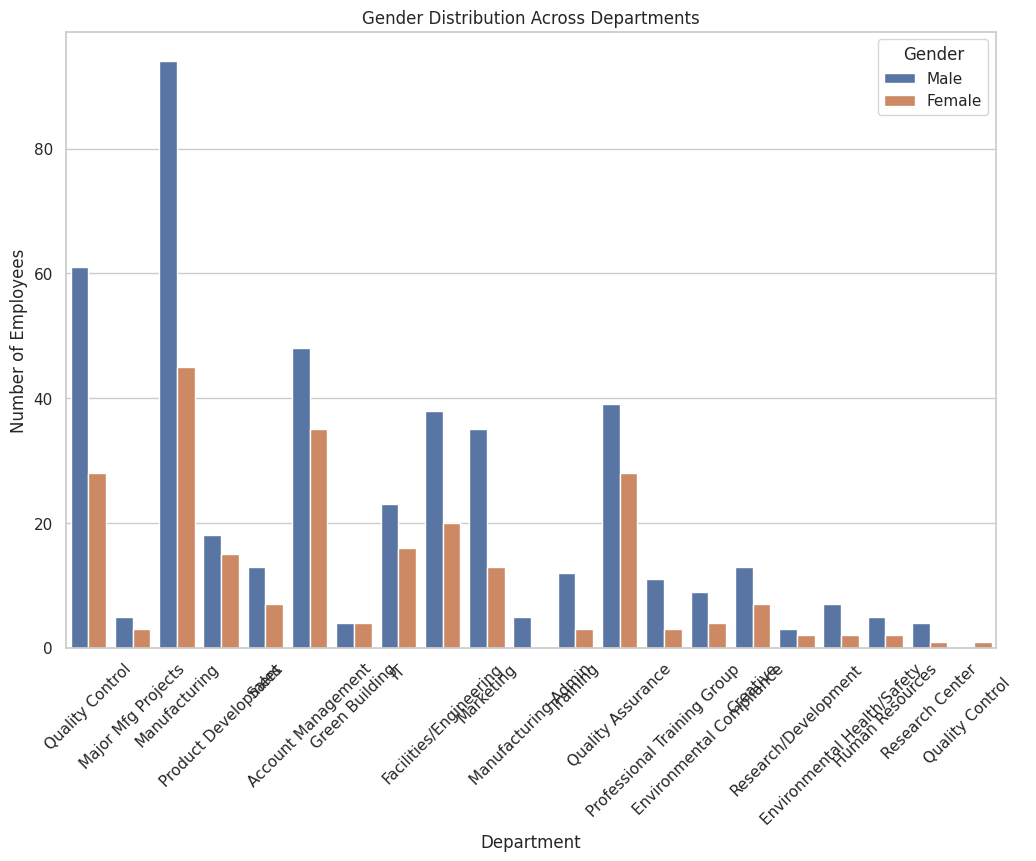

In [106]:
sns.set(style="whitegrid")

# Example: Creating a bar plot for 'Gender' and 'Department' columns
plt.figure(figsize=(12, 8))  # Set the figure size
sns.countplot(x='Department', hue='Gender', data=df)  # Create a bar plot with hue as 'Gender'

# Customize the plot
plt.title('Gender Distribution Across Departments')  # Add a title
plt.xlabel('Department')  # Add a label for the x-axis
plt.ylabel('Number of Employees')  # Add a label for the y-axis

# Rotate x-axis labels for better readability if there are many departments
plt.xticks(rotation=45)

# Show the plot
plt.show()

##Distribution of Annual Salary

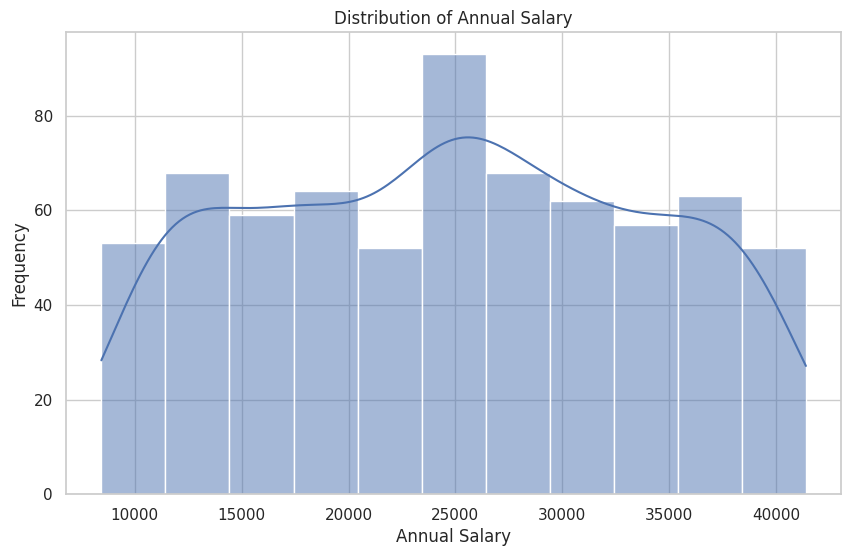

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Salary'], kde=True)
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()


##Box Plot of Annual Salary by Gender

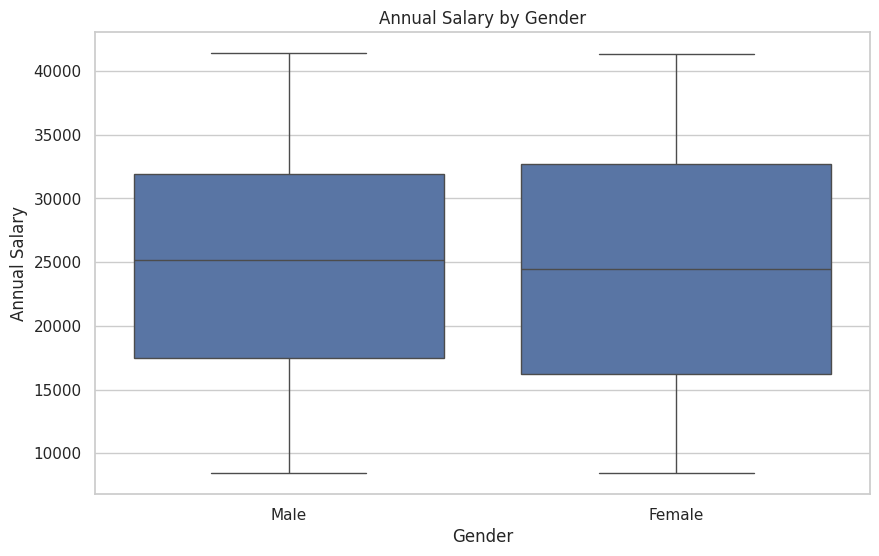

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Annual Salary', data=df)
plt.title('Annual Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Salary')
plt.show()


##Count of Employees by Department

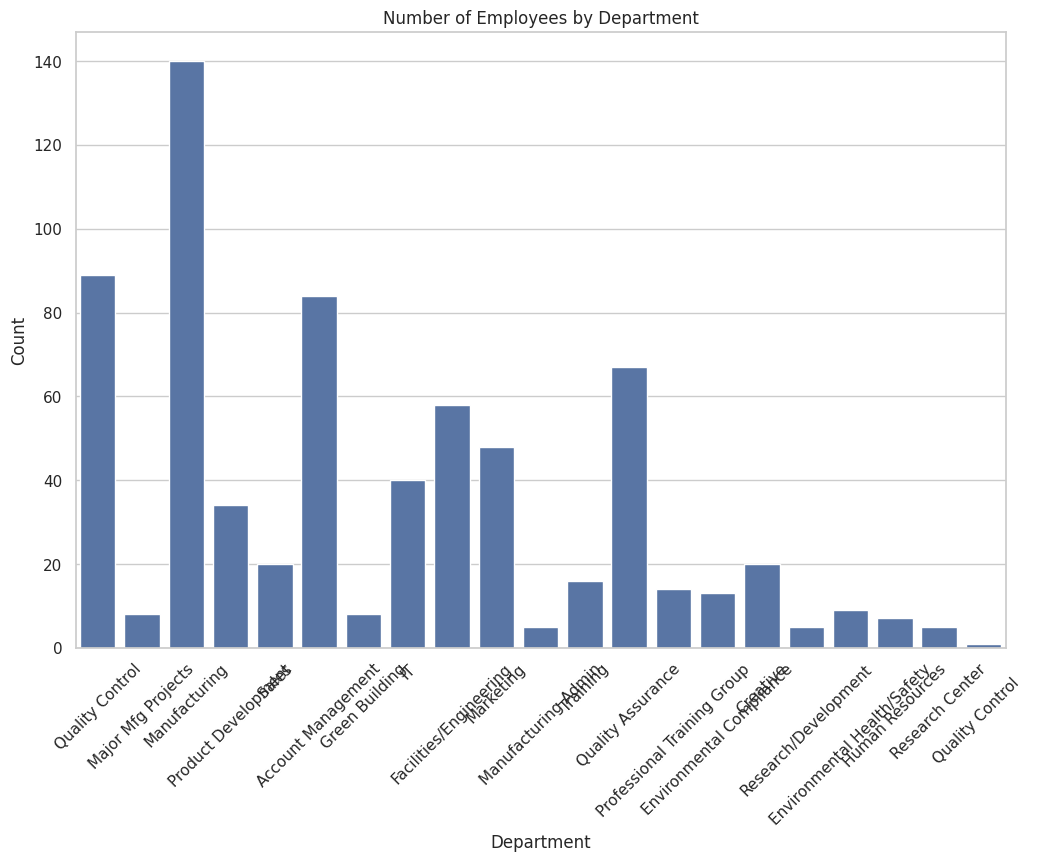

In [109]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Department', data=df)
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##Average Annual Salary by Country

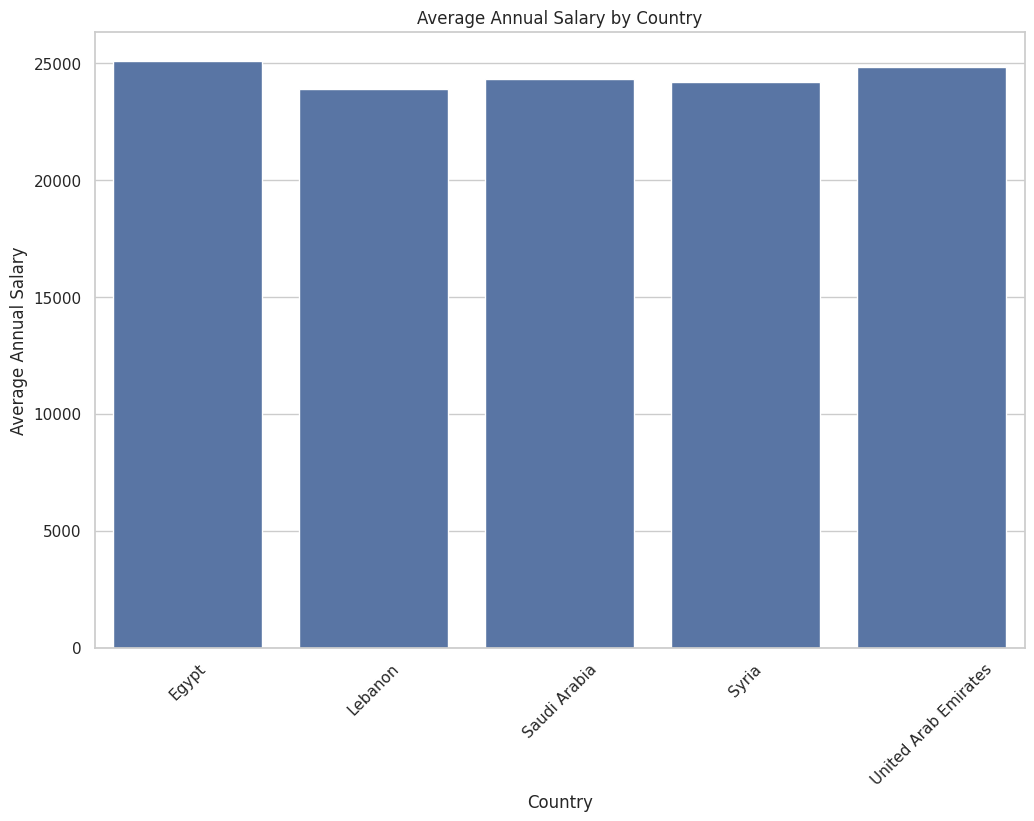

In [110]:
plt.figure(figsize=(12, 8))
avg_salary_by_country = df.groupby('Country')['Annual Salary'].mean().reset_index()
sns.barplot(x='Country', y='Annual Salary', data=avg_salary_by_country)
plt.title('Average Annual Salary by Country')
plt.xlabel('Country')
plt.ylabel('Average Annual Salary')
plt.xticks(rotation=45)
plt.show()
